In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [44]:
sns.set(rc={'figure.figsize':(15,10)})

In [33]:
dataset=pd.read_csv('house_data_prepared')
dataset.drop('Unnamed: 0',axis=1,inplace=True)
dataset.head()

,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,month,day,Total_power_consumed
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0,2006,12,16,14680.933333
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0,2006,12,17,36946.666667
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0,2006,12,18,19028.433333
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0,2006,12,19,13131.900000
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0,2006,12,20,20384.800000


### Basic Profile Report

In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   1433 non-null   object 
 1   Global_active_power    1433 non-null   float64
 2   Global_reactive_power  1433 non-null   float64
 3   Voltage                1433 non-null   float64
 4   Global_intensity       1433 non-null   float64
 5   Sub_metering_1         1433 non-null   float64
 6   Sub_metering_2         1433 non-null   float64
 7   Sub_metering_3         1433 non-null   float64
 8   year                   1433 non-null   int64  
 9   month                  1433 non-null   int64  
 10  day                    1433 non-null   int64  
 11  Total_power_consumed   1433 non-null   float64
dtypes: float64(8), int64(3), object(1)
memory usage: 134.5+ KB


In [35]:
dataset.columns

Index(['Date', 'Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'year', 'month', 'day', 'Total_power_consumed'],
      dtype='object')

#### Cheking for null values

In [36]:
dataset.isnull().sum()

Date                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
year                     0
month                    0
day                      0
Total_power_consumed     0
dtype: int64

In [37]:
dataset.duplicated().sum()

0

<AxesSubplot:>

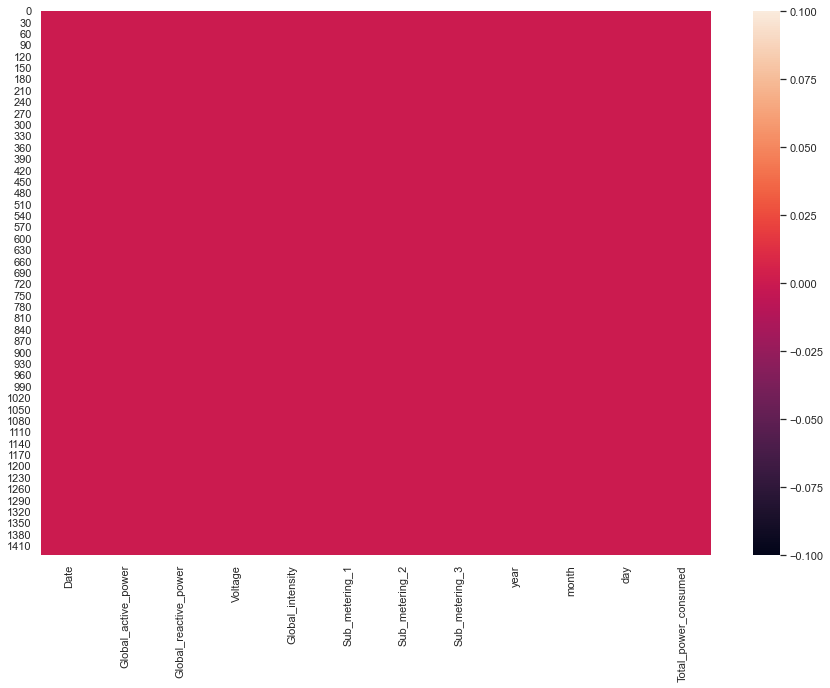

In [38]:
sns.heatmap(dataset.isnull())

#### Observation
- No null values in the dataset

##### Seperating continous and datetime features

In [39]:
continuous_features=[feature for feature in dataset.columns if dataset[feature].dtype!='O' and dataset[feature].dtype!='int64']
continuous_features

['Global_active_power',
 'Global_reactive_power',
 'Voltage',
 'Global_intensity',
 'Sub_metering_1',
 'Sub_metering_2',
 'Sub_metering_3',
 'Total_power_consumed']

In [40]:
### We have date time features

datatime_features=['year','month','day']
datatime_features

['year', 'month', 'day']

### Univariate analysis

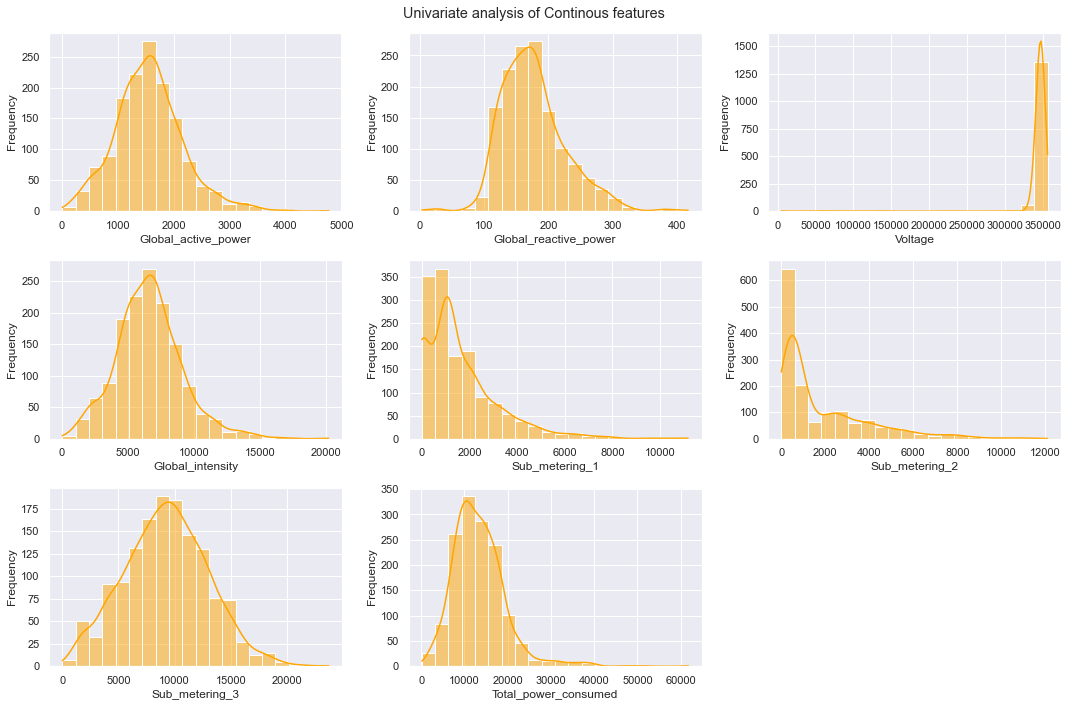

In [41]:
i=1
plt.suptitle('Univariate analysis of Continous features')
for feature in continuous_features:
    plt.subplot(3,3,i)
    i+=1
    sns.histplot(dataset[feature],kde=True,color='orange',bins=20)
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.tight_layout()

#### Bivariate Analysis with target feature

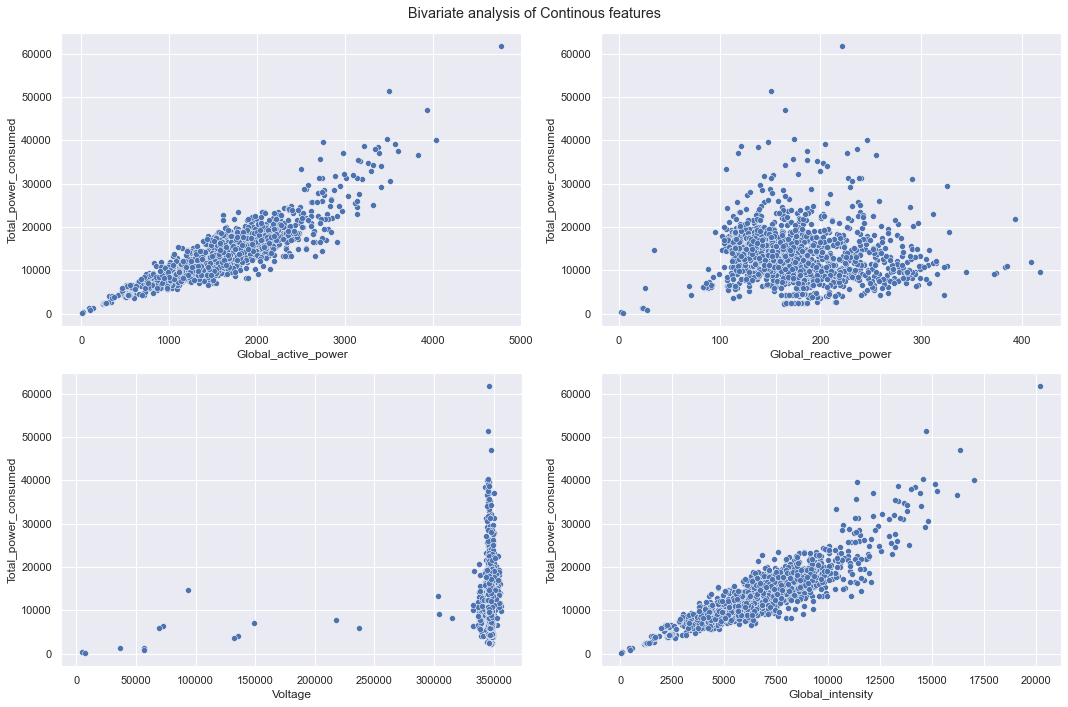

In [45]:
i=1
plt.suptitle('Bivariate analysis of Continous features')
for feature in ['Global_active_power', 'Global_reactive_power','Voltage', 'Global_intensity']:
    plt.subplot(2,2,i)
    i+=1
    sns.scatterplot(dataset[feature],dataset['Total_power_consumed'])
    plt.xlabel(feature)
    plt.ylabel('Total_power_consumed')
    plt.tight_layout()
    
    

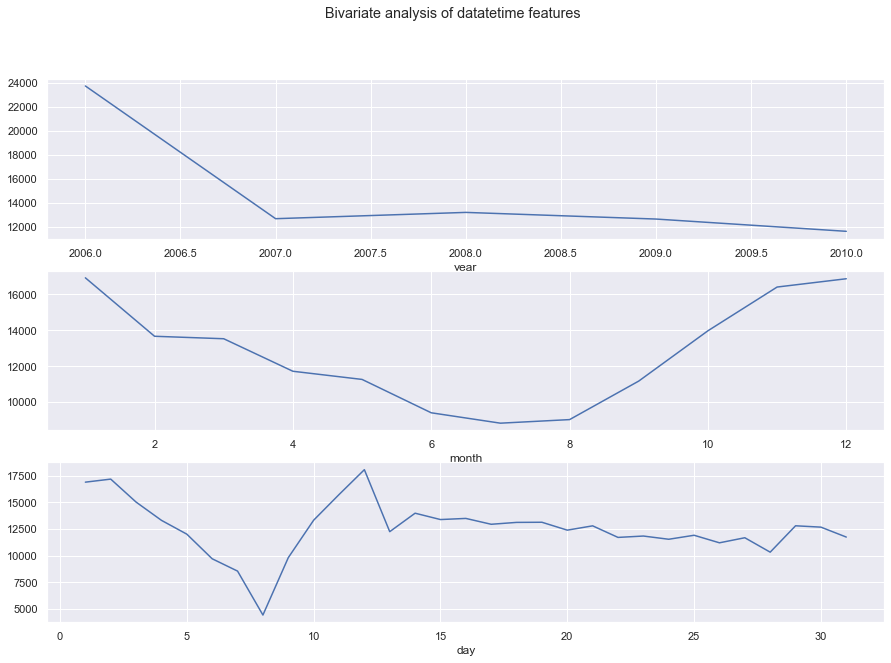

In [46]:
### Analysisg with year feature
i=1
plt.suptitle('Bivariate analysis of datatetime features')
for feature in datatime_features:
    plt.subplot(3,1,i)
    i+=1
    dataset.groupby(feature)['Total_power_consumed'].median().plot()

<AxesSubplot:>

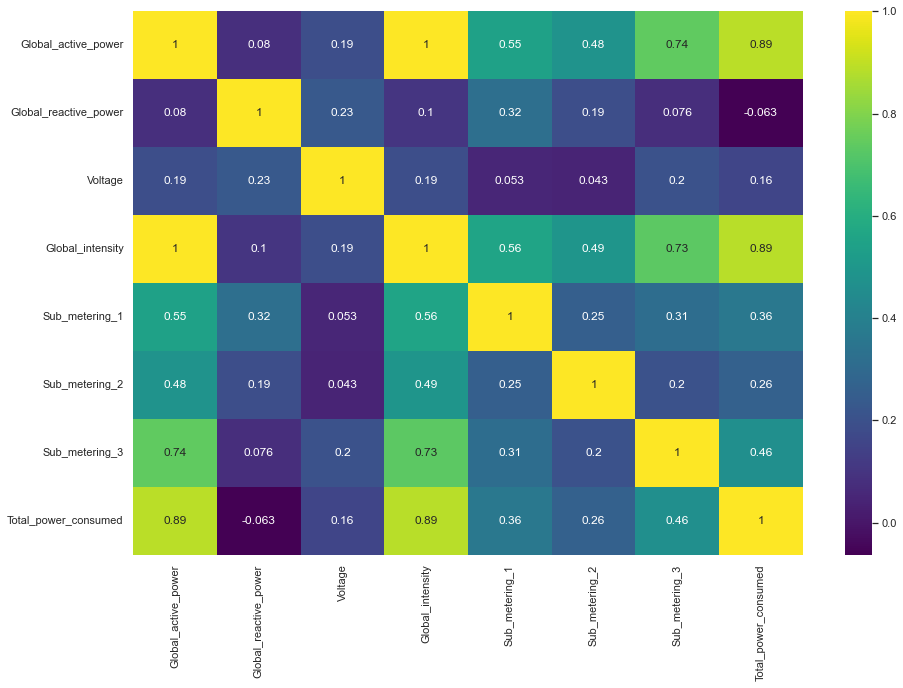

In [47]:
sns.heatmap(dataset[continuous_features].corr(),annot=True,cmap='viridis')

#### Observation
    - Global_active_power and Global_intensity these are highly positively correlated

### Checking for Outliers 

<AxesSubplot:>

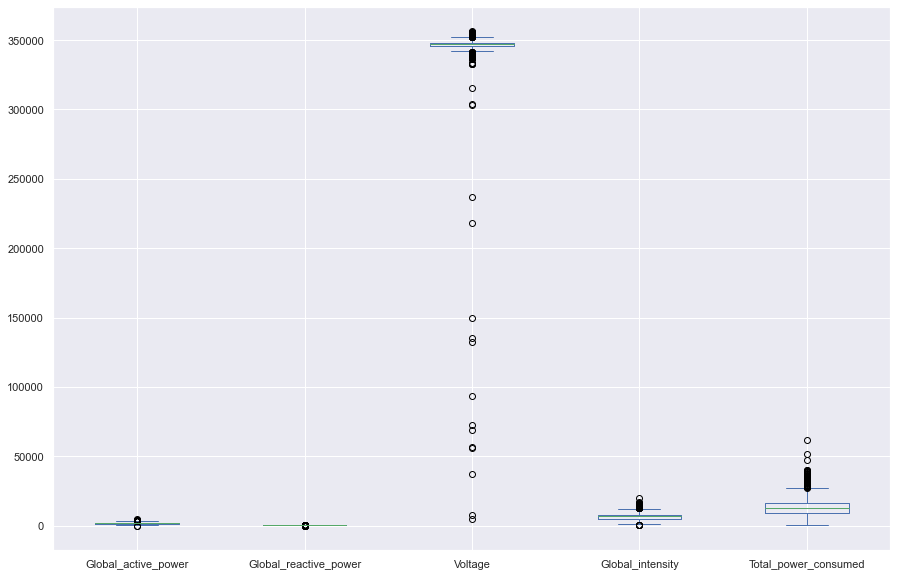

In [48]:
dataset[['Global_active_power', 'Global_reactive_power','Voltage', 'Global_intensity','Total_power_consumed']].plot.box()

- There are many outliers in the data we need to handle them